# Mammographic Mass Data Set

## Data Exploration

###  General Description

In [440]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report

from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report,confusion_matrix

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/mammographic-masses/mammographic_masses.data'
df = pd.read_csv(url, names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'], sep = ",", na_values = '?')
df.head(10)

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
5,4.0,65.0,1.0,NaN,3.0,0
6,4.0,70.0,NaN,NaN,3.0,0
7,5.0,42.0,1.0,NaN,3.0,0
8,5.0,57.0,1.0,5.0,3.0,1
9,5.0,60.0,NaN,5.0,1.0,1


In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
BI-RADS     959 non-null float64
Age         956 non-null float64
Shape       930 non-null float64
Margin      913 non-null float64
Density     885 non-null float64
Severity    961 non-null int64
dtypes: float64(5), int64(1)
memory usage: 45.1 KB


### Descriptive Statistics

In [442]:
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [443]:
df['Severity'].value_counts()

0    516
1    445
Name: Severity, dtype: int64

In [444]:
df['Severity'].value_counts(normalize='index')*100

0    53.694069
1    46.305931
Name: Severity, dtype: float64

#### Crosstabulation between Shape and Severity

In [445]:
pd.crosstab(df.Shape,df.Severity)

Severity,0,1
Shape,,
1.0,186,38
2.0,176,35
3.0,50,45
4.0,85,315


In [446]:
pd.crosstab(df.Shape,df.Severity, normalize='index')

Severity,0,1
Shape,,
1.0,0.830357,0.169643
2.0,0.834123,0.165877
3.0,0.526316,0.473684
4.0,0.212500,0.787500


#### Crosstabulation between Margin and Severity

In [447]:
pd.crosstab(df.Margin,df.Severity)

Severity,0,1
Margin,,
1.0,316,41
2.0,9,15
3.0,43,73
4.0,89,191
5.0,22,114


In [448]:
pd.crosstab(df.Margin,df.Severity, normalize='index')

Severity,0,1
Margin,,
1.0,0.885154,0.114846
2.0,0.375000,0.625000
3.0,0.370690,0.629310
4.0,0.317857,0.682143
5.0,0.161765,0.838235


#### Crosstabulation between Density and Severity

In [449]:
pd.crosstab(df.Density,df.Severity)

Severity,0,1
Density,,
1.0,9,7
2.0,41,18
3.0,405,393
4.0,7,5


In [450]:
pd.crosstab(df.Density,df.Severity, normalize='index')

Severity,0,1
Density,,
1.0,0.562500,0.437500
2.0,0.694915,0.305085
3.0,0.507519,0.492481
4.0,0.583333,0.416667


#### Histogram of Age

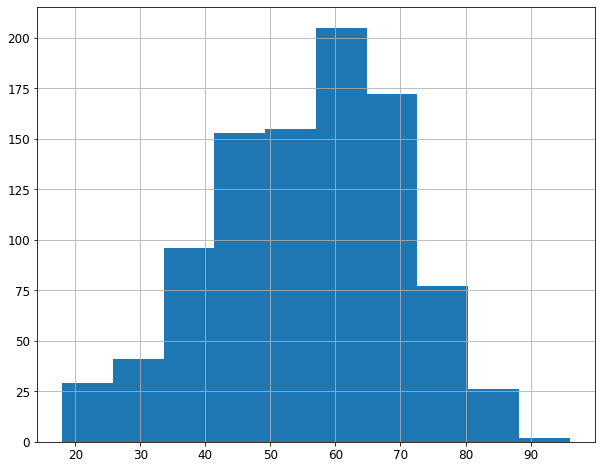

In [451]:
#DataVisualization
df['Age'].hist(figsize=(10,8))

### Missing Values

In [452]:
df.isnull().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [453]:
null_data = df[df.isnull().any(axis=1)] #there are 131 instances with at least 1 Nan
print(null_data) #code from stackoverflow https://stackoverflow.com/questions/30447083/python-pandas-return-only-those-rows-which-have-missing-values

     BI-RADS   Age  Shape  Margin  Density  Severity
1        4.0  43.0    1.0     1.0      NaN         1
4        5.0  74.0    1.0     5.0      NaN         1
5        4.0  65.0    1.0     NaN      3.0         0
6        4.0  70.0    NaN     NaN      3.0         0
7        5.0  42.0    1.0     NaN      3.0         0
9        5.0  60.0    NaN     5.0      1.0         1
12       4.0  64.0    1.0     NaN      3.0         0
19       4.0  40.0    1.0     NaN      NaN         0
20       NaN  66.0    NaN     NaN      1.0         1
22       4.0  43.0    1.0     NaN      NaN         0
26       2.0  66.0    1.0     1.0      NaN         0
27       5.0  63.0    3.0     NaN      3.0         0
35       4.0  77.0    3.0     NaN      NaN         0
38       4.0  48.0    4.0     5.0      NaN         1
40       4.0  59.0    2.0     1.0      NaN         0
43       4.0  61.0    2.0     1.0      NaN         0
45       5.0  44.0    2.0     4.0      NaN         1
47       4.0  23.0    1.0     1.0      NaN    

### Understanding the Features with Visualisation

#### Correlation Matrix 

In [454]:
# we want to see the correlation between pairs of variables
# a basis for feature selection
# This is the data that hasn't been imputed
import matplotlib.pyplot as plt
import seaborn as sns

f=plt.figure(figsize=(19, 15))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,BI-RADS,Age,Shape,Margin,Density,Severity
BI-RADS,1,0.0947541,0.186055,0.163086,0.038729,0.231601
Age,0.0947541,1,0.364077,0.411355,0.0289545,0.432066
Shape,0.186055,0.364077,1,0.742211,0.0786661,0.563308
Margin,0.163086,0.411355,0.742211,1,0.109392,0.574919
Density,0.038729,0.0289545,0.0786661,0.109392,1,0.0640101
Severity,0.231601,0.432066,0.563308,0.574919,0.0640101,1


<Figure size 1368x1080 with 0 Axes>

#### Plot

In [455]:
import numpy as np
#get some features of the tumour, indexing starts with 0
feature1 = np.array(df.loc[:, 'Age'].values) #mean radius
feature2 = np.array(df.loc[:, 'Shape'].values) #mean texture
feature3 = np.array(df.loc[:, 'Margin'].values) #mean area

In [456]:
#transfer into numpy
X = np.array(df.loc[:, 'Age':'Density'].values)
y = np.array(df.loc[:, 'Severity'].values) # class label is contained here

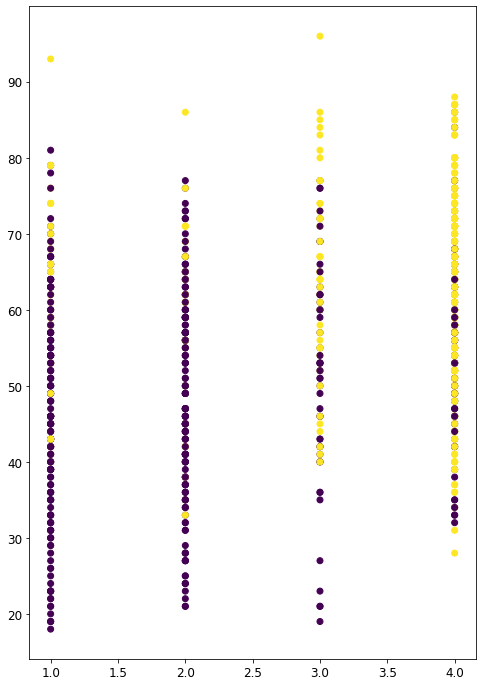

In [457]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,12))
plt.scatter(feature2, feature1, c=y) # plot the feature space with color coded classes

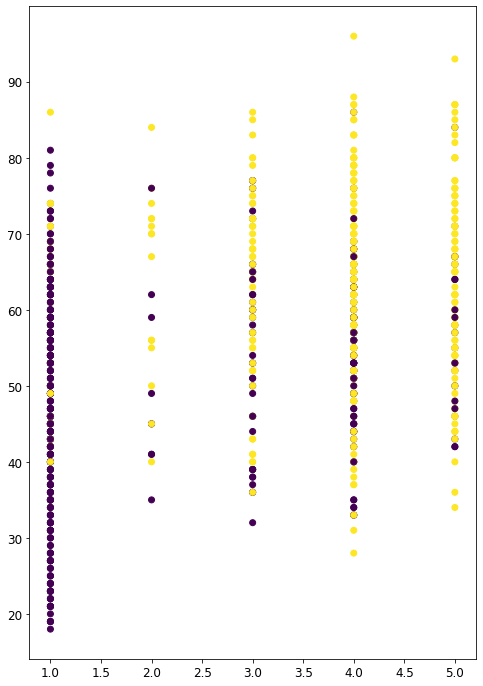

In [458]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,12))
plt.scatter(feature3, feature1, c=y) # plot the feature space with color coded classes

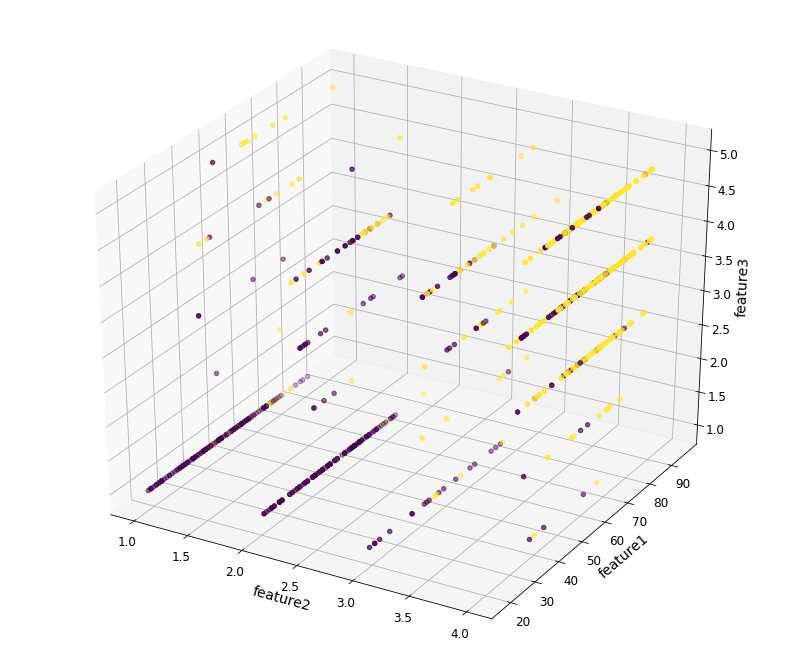

In [459]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feature2, feature1, feature3, c=y)
ax.set_xlabel('feature2')
ax.set_ylabel('feature1')
ax.set_zlabel('feature3')

plt.show()

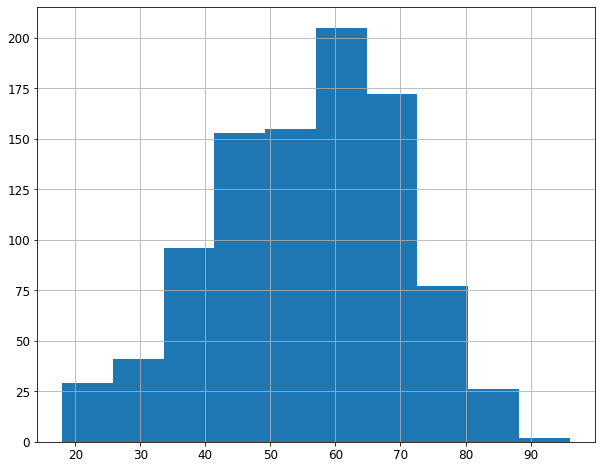

In [460]:
#DataVisualization
df['Age'].hist(figsize=(10,8))

From the data exploration we can conclude important points as follow=

1. The dataset has 5 variables (BR-RADS, Age, Shape, Margin, Density) and 1 class target (Severity) with 961 instances. The data types are float for all variables, because I change the '?' to NaN this step to help identifying the missing values.
2. There are 131 instances with at least one missing values out of 961 instances (13.63%).
3. From the correlation matrix of the original dataset, the top three features which have the highest correlation with the class target are Margin, Shape and Age. Three of them have a positive correlation with Severity as class target. Another interesting to see, Margin and Shape has a high correlation with each other that might cause a multicollinearity problem in the model.

#### Conclusion:
From the data exploration we found that the amount of missing value is considered to be large. Dealing with missing values has so much to do with missing mechanism. When the missing mechanism is missing completely at random, complete case analysis is plausible to do. But when the missing mechanism is missing at random or missing not at random, complete case analysis will introduce bias and bad prediction. In this case, because we do not have additional explanations about why the values are missing, I will do two ways of dealing with missing values and compare them=

1. Complete case analysis. We will drop all the instances with missing value and only use the instances with the complete data ( I will use the dataset as df1)
2. Mean imputation for continuous variable (Age) and keeping the missing value as another category (labeled as 0) for categorical variable (I will use the dataset as df2)

## A. Complete Case Analysis (df1)

### Feature Engineering

#### Dealing with missing values

In [461]:
# features BI-RADS is non-predictive so we can drop the column, also we will drop the instances with missing values
df1=df.drop(columns=['BI-RADS']).dropna().astype(int)
df1.head()

,Age,Shape,Margin,Density,Severity
0,67,3,5,3,1
2,58,4,5,3,1
3,28,1,1,3,0
8,57,1,5,3,1
10,76,1,4,3,1


In [462]:
#we will check the missing values
df1.isnull().sum()

Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [463]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 831 entries, 0 to 960
Data columns (total 5 columns):
Age         831 non-null int32
Shape       831 non-null int32
Margin      831 non-null int32
Density     831 non-null int32
Severity    831 non-null int32
dtypes: int32(5)
memory usage: 22.7 KB


In [464]:
#Descriptive statistics of class label
np.mean(y1), np.std(y1), np.var(y1)

(0.48495788206979545, 0.49977368346900164, 0.24977373468817385)

## A.1 K-Nearest Neighbors

### A.1.1 Feature Engineering

#### Feature Selection

In [465]:
# we now will check the correlation matrix
# codes copied from https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
import matplotlib.pyplot as plt
import seaborn as sns

f=plt.figure(figsize=(19, 15))
corr = df1.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,Shape,Margin,Density,Severity
Age,1,0.379557,0.420516,0.052338,0.45524
Shape,0.379557,1,0.738226,0.0742072,0.56297
Margin,0.420516,0.738226,1,0.125032,0.573088
Density,0.052338,0.0742072,0.125032,1,0.0683282
Severity,0.45524,0.56297,0.573088,0.0683282,1


<Figure size 1368x1080 with 0 Axes>

In [466]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = df1.iloc[:, 0:4]  #independent columns
y = df1.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
print(featureScores.nlargest(4,'Score'))  #print 10 best features

  Features       Score
0      Age  663.099237
2   Margin  237.740611
1    Shape  145.864292
3  Density    0.163489


Because we only have a short amount of features, I did not think we need to do Sequential Backward/Forward Selection. From the correlation matrix and Best feature ranking above, we can narrow down the features to Age, Shape and Margin. We will then manually try all the possible combination of features and pick the best one.

#### Redefining the Data Selection

In [467]:
# Based on the trying all the best combinantions, the highest performance was performed by Age, Shape and Margin

X_knn = np.array(df1.iloc[:, :3].values)
y_knn = np.array(df1.iloc[:, -1].values) # class label is contained here

In [468]:
splitRatio = 0.8

# Use a random  split of the data
X_train1, X_test1, y_train1, y_test1 = \
        train_test_split(X_knn, y_knn, test_size=(1-splitRatio), random_state=0)

In [469]:
mms = MinMaxScaler()
X_knn_train = mms.fit_transform(X_train1)
X_knn_test = mms.transform(X_test1)

y_knn_train=y_train1
y_knn_test=y_test1

X_knn_train
X_knn_test

array([[ 0.71621622,  1.        ,  0.25      ],
       [ 0.62162162,  1.        ,  0.75      ],
       [ 0.22972973,  0.33333333,  0.5       ],
       [ 0.51351351,  0.        ,  0.        ],
       [ 0.47297297,  0.        ,  0.        ],
       [ 0.60810811,  0.        ,  0.        ],
       [ 0.60810811,  0.33333333,  0.75      ],
       [ 0.64864865,  1.        ,  0.75      ],
       [ 0.66216216,  1.        ,  0.75      ],
       [ 0.58108108,  1.        ,  1.        ],
       [-0.01351351,  0.        ,  0.        ],
       [ 0.5       ,  0.33333333,  0.        ],
       [ 0.72972973,  0.66666667,  0.75      ],
       [ 0.16216216,  0.        ,  0.        ],
       [ 0.36486486,  0.        ,  0.        ],
       [ 0.05405405,  0.        ,  0.        ],
       [ 0.60810811,  1.        ,  1.        ],
       [ 0.18918919,  0.        ,  0.        ],
       [ 0.45945946,  0.33333333,  0.        ],
       [ 0.66216216,  0.        ,  0.        ],
       [ 0.74324324,  0.33333333,  0.   

#### Training the Dataset with Default KNN Classifier

In [470]:
#solution
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn=clf_knn.fit(X_knn_train, y_knn_train)

In [471]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_knn_pred_def = clf_knn.predict(X_knn_train)
print('Precision: %.4f' %precision_score(y_knn_train, y_knn_pred_def))
print('Accuracy: %.4f' %accuracy_score(y_knn_train, y_knn_pred_def))
print('Recall: %.4f' %recall_score(y_knn_train, y_knn_pred_def))
print('F1 score: %.4f' % f1_score(y_knn_train, y_knn_pred_def))

Precision: 0.8121
Accuracy: 0.8328
Recall: 0.8593
F1 score: 0.8351


In [472]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_knn_train, y_knn_pred_def, labels=[1, 0])

Confusion Matrix


array([[281,  46],
       [ 65, 272]], dtype=int64)

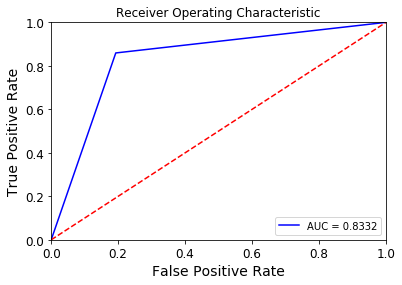

In [473]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_knn_train, y_knn_pred_def)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Testing the Test Dataset with Default Algorithm

In [474]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_knn_pred_def2 = clf_knn.predict(X_knn_test)
print('Precision: %.4f' %precision_score(y_knn_test, y_knn_pred_def2))
print('Accuracy: %.4f' %accuracy_score(y_knn_test, y_knn_pred_def2))
print('Recall: %.4f' %recall_score(y_knn_test, y_knn_pred_def2))
print('F1 score: %.4f' % f1_score(y_knn_test, y_knn_pred_def2))

Precision: 0.7805
Accuracy: 0.8204
Recall: 0.8421
F1 score: 0.8101


In [475]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_knn_test, y_knn_pred_def2, labels=[1, 0])

Confusion Matrix


array([[64, 12],
       [18, 73]], dtype=int64)

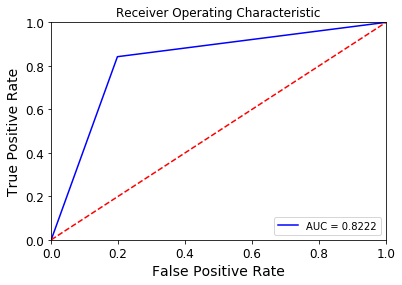

In [476]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_knn_test, y_knn_pred_def2)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Using GridSearch CV to find the best Hyperparameter Tuning

In [477]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

kn = KNeighborsClassifier()

k_range=list(range(1,100,2))

parameter_grid = {'algorithm':['auto'], 'metric':['minkowski', 'euclidean'],
                     'metric_params':[None], 'n_jobs':[None], 'n_neighbors':k_range, 'p':[2],
                     'weights':['uniform', 'distance']}

grid_kn = GridSearchCV(estimator = kn, scoring = 'precision', param_grid = parameter_grid,
                          cv = 10, verbose=1)

grid_kn.fit(X_knn_train, y_knn_train)

print ("Best Score: {}".format(grid_kn.best_score_))
print ("Best params: {}".format(grid_kn.best_params_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 0.7864568830639106
Best params: {'algorithm': 'auto', 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 21, 'p': 2, 'weights': 'uniform'}


[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    8.8s finished
C:\Users\aenyd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


#### Training the Model with the Optimized Hyperparameters from the GridSearch CV

In [478]:
#solution
from sklearn.neighbors import KNeighborsClassifier
clf_knn_1 = KNeighborsClassifier(n_neighbors=21, metric='minkowski')

clf_knn_1.fit(X_knn_train, y_knn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [479]:

# We use a utility to generate artificial classification data.
y_knn_pred_train = clf_knn_1.predict(X_knn_train)

print('Precision: %.4f' %precision_score(y_knn_train, y_knn_pred_train))
print('Accuracy: %.4f' %accuracy_score(y_knn_train, y_knn_pred_train))
print('Recall: %.4f' %recall_score(y_knn_train, y_knn_pred_train))
print('F1 score: %.4f' % f1_score(y_knn_train, y_knn_pred_train))

Precision: 0.7845
Accuracy: 0.8057
Recall: 0.8349
F1 score: 0.8089


In [480]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_knn_train, y_knn_pred_train, labels=[1, 0])

Confusion Matrix


array([[273,  54],
       [ 75, 262]], dtype=int64)

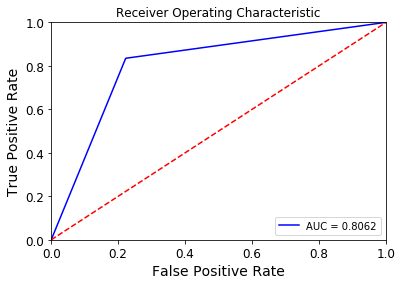

In [481]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_knn_train, y_knn_pred_train)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Testing the Dataset with Optimzied Model and Evaluation Performance

In [482]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_knn_pred_1 = clf_knn_1.predict(X_knn_test)

print('Precision: %.4f' %precision_score(y_knn_test, y_knn_pred_1))
print('Accuracy: %.4f' %accuracy_score(y_knn_test, y_knn_pred_1))
print('Recall: %.4f' %recall_score(y_knn_test, y_knn_pred_1))
print('F1 score: %.4f' % f1_score(y_knn_test, y_knn_pred_1))

Precision: 0.8205
Accuracy: 0.8443
Recall: 0.8421
F1 score: 0.8312


In [483]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_knn_test, y_knn_pred_1, labels=[1, 0])

Confusion Matrix


array([[64, 12],
       [14, 77]], dtype=int64)

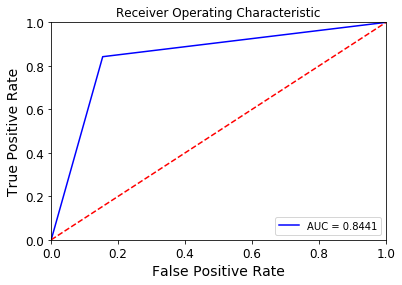

In [484]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_knn_test, y_knn_pred_1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Sensitivity Analysis

In [485]:
# Create Decision Tree classifer object
sens_knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')

sens_knn=sens_knn.fit(X_knn_train, y_knn_train)

In [486]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_knn_pred_sens = sens_knn.predict(X_knn_test)

print('Precision: %.4f' %precision_score(y_knn_test, y_knn_pred_sens))
print('Accuracy: %.4f' %accuracy_score(y_knn_test, y_knn_pred_sens))
print('Recall: %.4f' %recall_score(y_knn_test, y_knn_pred_sens))
print('F1 score: %.4f' % f1_score(y_knn_test, y_knn_pred_sens))

Precision: 0.7250
Accuracy: 0.7605
Recall: 0.7632
F1 score: 0.7436


In [487]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_knn_test, y_knn_pred_sens, labels=[1, 0])

Confusion Matrix


array([[58, 18],
       [22, 69]], dtype=int64)

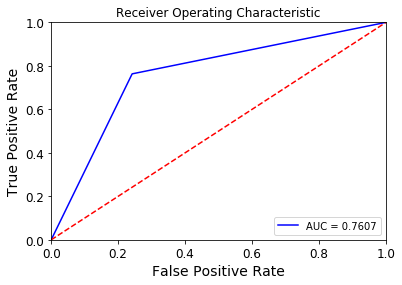

In [488]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_knn_test, y_knn_pred_sens)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## A.2 Decision Tree

### A.2.1 Feature Engineering

#### Redifining Data Selection

In [489]:
# Based on the trying all the best combinantions, the highest performance was performed by Shape and Margin
X_dt = np.array(df1.iloc[:, [1,2]].values)
y_dt = np.array(df1.iloc[:, -1].values) # class label is contained here

In [490]:
splitRatio = 0.8

# Use a random  split of the data
X_dt_train1, X_dt_test1, y_dt_train1, y_dt_test1 = \
        train_test_split(X_dt, y_dt, test_size=(1-splitRatio), random_state=0)

In [491]:
#Check:
print ('X_dt_train1 dimensions: ', X_dt_train1.shape)
print ('y_dt_train1 dimensions: ', y_dt_train1.shape)
print ('X_dt_test1 dimensions: ', X_dt_test1.shape)
print ('y_dt_test1 dimensions: ', y_dt_test1.shape)

X_dt_train1 dimensions:  (664, 2)
y_dt_train1 dimensions:  (664,)
X_dt_test1 dimensions:  (167, 2)
y_dt_test1 dimensions:  (167,)


#### Training the Model Using the Default Hyperparameter

In [492]:
# Create Decision Tree classifer object
clf_dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf_dt = clf.fit(X_dt_train1,y_dt_train1)

In [493]:
#Predict the response for test dataset
y_dt_pred_def = clf_dt.predict(X_dt_train1)


print('Precision: %.4f' %precision_score(y_dt_train1, y_dt_pred_def))
print('Accuracy: %.4f' %accuracy_score(y_dt_train1, y_dt_pred_def))
print('Recall: %.4f' %recall_score(y_dt_train1, y_dt_pred_def))
print('F1 score: %.4f' % f1_score(y_dt_train1, y_dt_pred_def))

Precision: 0.7649
Accuracy: 0.8027
Recall: 0.8654
F1 score: 0.8121


In [494]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_dt_train1, y_dt_pred_def, labels=[1, 0])

Confusion Matrix


array([[283,  44],
       [ 87, 250]], dtype=int64)

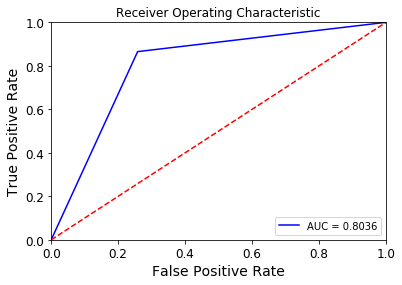

In [495]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_dt_train1, y_dt_pred_def)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Testing the Data Set Using the Default Hyperparameter

In [496]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_dt_pred_def2 = clf_dt.predict(X_dt_test1)
print('Precision: %.4f' %precision_score(y_dt_test1, y_dt_pred_def2))
print('Accuracy: %.4f' %accuracy_score(y_dt_test1, y_dt_pred_def2))
print('Recall: %.4f' %recall_score(y_dt_test1, y_dt_pred_def2))
print('F1 score: %.4f' % f1_score(y_dt_test1, y_dt_pred_def2))

Precision: 0.7831
Accuracy: 0.8263
Recall: 0.8553
F1 score: 0.8176


In [497]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_dt_test1, y_dt_pred_def2, labels=[1, 0])

Confusion Matrix


array([[65, 11],
       [18, 73]], dtype=int64)

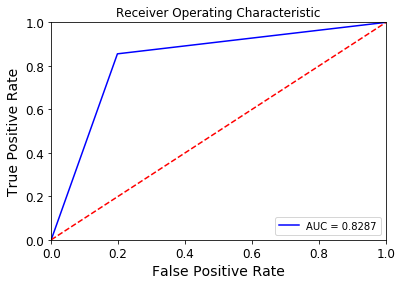

In [498]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_dt_test1, y_dt_pred_def2)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Using GridSearch CV to find the Best Hyperparameter Tuning

In [499]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier()

parameter_grid = {'max_depth': np.arange(3, 10), 'criterion':('gini', 'entropy'), 'min_samples_split':np.arange(2,10)}

grid_dt = GridSearchCV(estimator = dt, scoring = 'precision', param_grid = parameter_grid,
                          cv = 10, verbose=1)

grid_dt.fit(X_dt_train1, y_dt_train1)

print ("Best Score: {}".format(grid_dt.best_score_))
print ("Best params: {}".format(grid_dt.best_params_))
print ("Best estimators: {}".format(grid_dt.best_estimator_))

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Score: 0.7660151975182431
Best params: {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 2}
Best estimators: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


[Parallel(n_jobs=1)]: Done 1120 out of 1120 | elapsed:    1.6s finished
C:\Users\aenyd\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### A.2.2 Model Training

In [500]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(max_depth=4, criterion='gini', min_samples_split=2)

# Train Decision Tree Classifer
clf2 = clf2.fit(X_dt_train1,y_dt_train1)

In [501]:
#Predict the response for test dataset
y_dt_pred_train = clf2.predict(X_dt_train1)

print('Precision: %.4f' %precision_score(y_dt_train1, y_dt_pred_train))
print('Accuracy: %.4f' %accuracy_score(y_dt_train1, y_dt_pred_train))
print('Recall: %.4f' %recall_score(y_dt_train1, y_dt_pred_train))
print('F1 score: %.4f' % f1_score(y_dt_train1, y_dt_pred_train))

Precision: 0.7642
Accuracy: 0.8012
Recall: 0.8624
F1 score: 0.8103


In [502]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_dt_train1, y_dt_pred_train, labels=[1, 0])

Confusion Matrix


array([[282,  45],
       [ 87, 250]], dtype=int64)

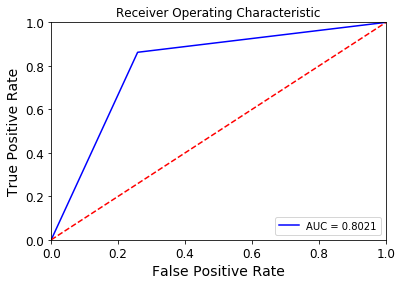

In [503]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_dt_train1, y_dt_pred_train)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### A.2.3 Model Testing

In [504]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_dt_pred1 = clf2.predict(X_dt_test1)

print('Precision: %.4f' %precision_score(y_dt_test1, y_dt_pred1))
print('Accuracy: %.4f' %accuracy_score(y_dt_test1, y_dt_pred1))
print('Recall: %.4f' %recall_score(y_dt_test1, y_dt_pred1))
print('F1 score: %.4f' % f1_score(y_dt_test1, y_dt_pred1))

Precision: 0.7927
Accuracy: 0.8323
Recall: 0.8553
F1 score: 0.8228


In [505]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_dt_test1, y_dt_pred1, labels=[1, 0])

Confusion Matrix


array([[65, 11],
       [17, 74]], dtype=int64)

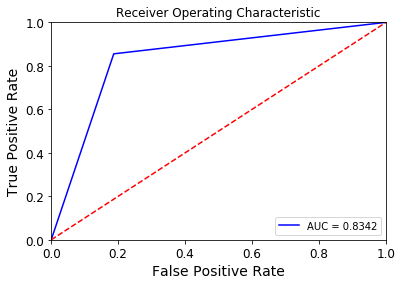

In [506]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_dt_test1, y_dt_pred1)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [507]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

from sklearn.tree import DecisionTreeClassifier

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"

def image_path(fig_id):
    return os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id)

def save_fig(fig_id, tight_layout=True):
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path(fig_id) + ".png", format='png', dpi=300)

In [508]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [509]:
!pip install pydotplus

In [510]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


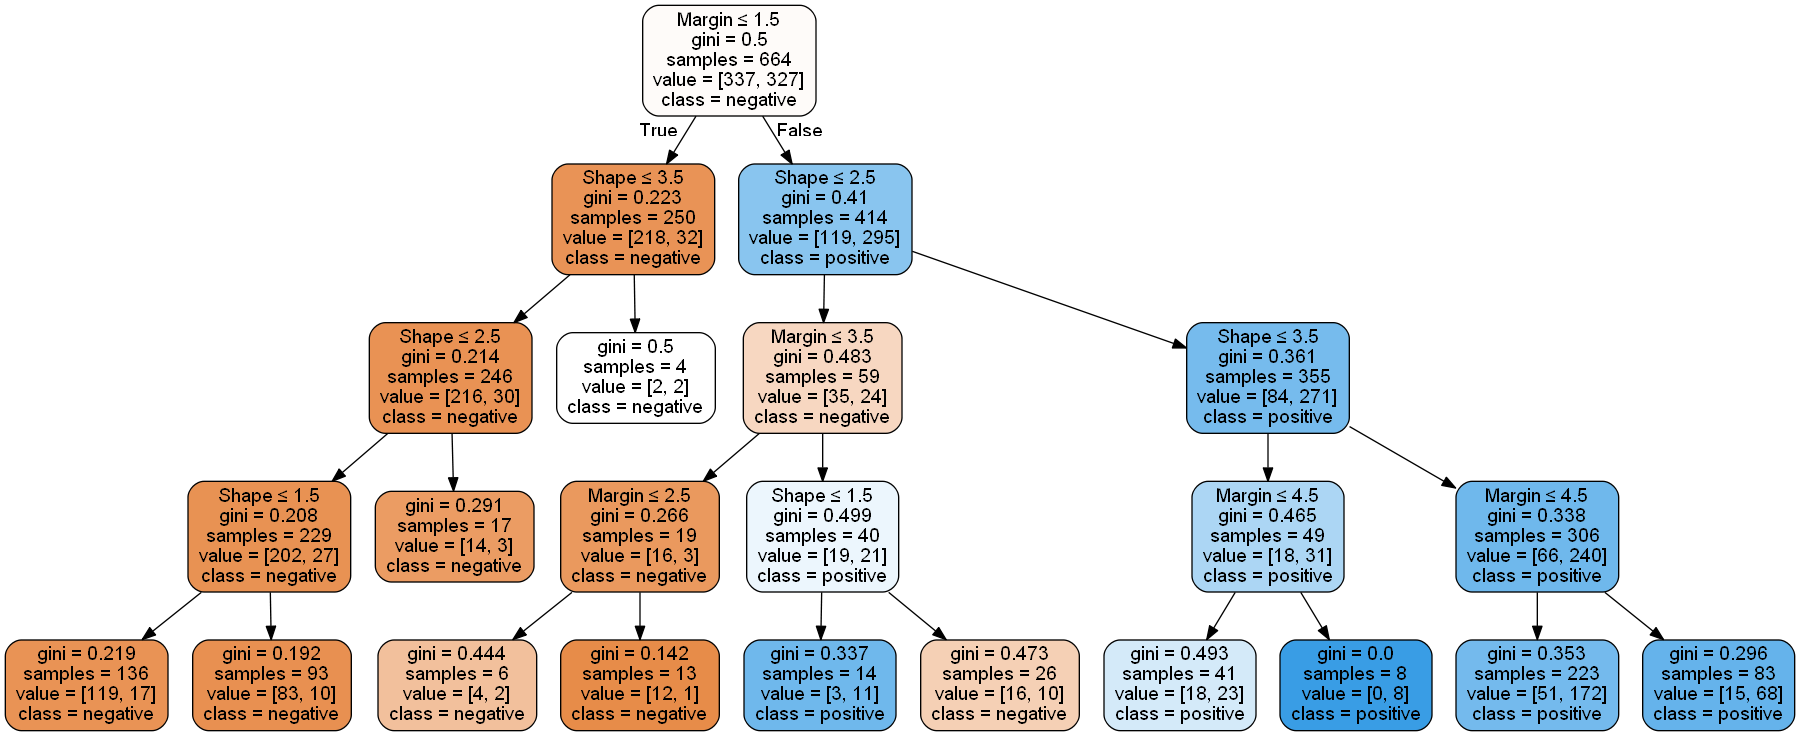

In [511]:
import graphviz 
import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
dot_data=StringIO()
cols2=['Shape', 'Margin']
dot_data = export_graphviz(clf_dt_1, out_file = None, feature_names=cols2, class_names=['negative', 'positive'], 
                filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
#print(dot_data)
Image(graph.create_png())

#### Sensitivity Analysis

In [512]:
# Create Decision Tree classifer object
sens_df = DecisionTreeClassifier(max_depth=1, criterion='gini')

# Train Decision Tree Classifer
sens_df = sens_df.fit(X_dt_train1,y_dt_train1)

In [513]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# We use a utility to generate artificial classification data.
y_dt_pred_sens = sens_df.predict(X_dt_test1)

print('Precision: %.4f' %precision_score(y_dt_test1, y_dt_pred_sens))
print('Accuracy: %.4f' %accuracy_score(y_dt_test1, y_dt_pred_sens))
print('Recall: %.4f' %recall_score(y_dt_test1, y_dt_pred_sens))
print('F1 score: %.4f' % f1_score(y_dt_test1, y_dt_pred_sens))

Precision: 0.7216
Accuracy: 0.8024
Recall: 0.9211
F1 score: 0.8092


In [514]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix")
# Note the use of labels for set 1=True to upper left and 0=False to lower right
confusion_matrix(y_dt_test1, y_dt_pred_sens, labels=[1, 0])

Confusion Matrix


array([[70,  6],
       [27, 64]], dtype=int64)

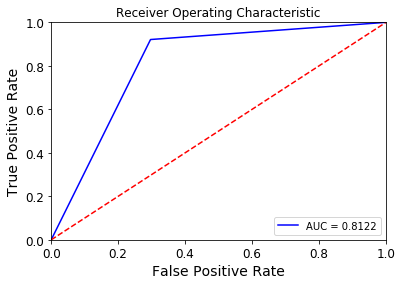

In [515]:
from sklearn import metrics
from sklearn import neighbors
%matplotlib inline

fpr, tpr, threshold = metrics.roc_curve(y_dt_test1, y_dt_pred_sens)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()